## A look at the Seattle AirBnB neighborhoods


This is the Jupyter notebook associated with the Medium blog: [whered-the-hippies-go](https://medium.com/@bridgethass/whered-the-hippies-go-aee4b0876dc7)

This notebook explores the Seattle Airbnb Open Data https://www.kaggle.com/airbnb/seattle/data, focusing in on the `listings.csv` in an attempt to gain a better sense of the neighborhoods. Specifically I looked at whether there may be a relationship between neighborhoods and: 
    
    1) cleanliness rating 
    2) room type (entire house, private room, shared room) 
    
The notebook is broken into three sections, where the first part I am just getting a sense for the data and relationships between different variables, etc. 

    1) Initial Data Exploration
    2) Neighbourhood Exploration
       2a) Cleanliness
       2b) Communal Living (Room Type)
    3) Predicting Cleanliness Rating from other Factors
    
**CRISP-DM Process**:

*Business Understanding*

I used the initial data exploration to gain a better sense of the data, and come up with some business(ish)-related questions to ask, around the theme of understanding Seattle's changing culture from having a strong counter-culture to a now more tech-heavy population. Questions I decided to investigate are:
    
    1) Do cleanliness review scores vary significantly between different neighborhoods (or neighbourhood groups)?
    2) Do certain neighbourhoods have higher proportions of shared housing listings (private room or shared room)
    3) What factors (if any) affect cleanliness rating?

*Data Understanding*

The first part of this notebook is centered around getting a sense of the listings.csv file, the types and contents of the different variables, etc.

*Data Preparation*

Data preparation steps are carried out throughout the notebook, and include handling categorical data, converting variables to the correct format (eg. price "objects" to numerical data), identifying and removing irrelevant parameters (eg. id, urls, etc.), and cleaning messy variables (eg. amenities with various combinations of unique values)

*Data Modeling (and Visualization)*

The first two questions were answered using map-view data visualizations. A linear model is generated to predict cleanliness ratings is also presented, but with sub-par results, which are discussed. 

 *Result Evaluation*

Model results were not very robust, however, going through all the steps to better understand the dataset suggest that the variable we are predicting does not have a lot of variation within this particular data set, so we likely need either more data to obtain more conclusive results. Results and lessons learned are summarized at the end of the notebook and in the Medium blog.

#### Python Requirements and Installations

this notebook runs on Python 3.6.7

non-standard installations from conda include:
    - `conda install basemap`
    - `conda install -c conda-forge basemap-data-hires`

also make sure that the `pandas` version is at least 0.25+ so we can use the handy `explode` method

Display the verison of Python I'm using, then import some required packages.

In [1]:
import sys
sys.version

'3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]'

In [2]:
import numpy as np
import pandas as pd

# plotting / visualizaiton packages
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from mpl_toolkits.basemap import Basemap

# statistics and machine learning packages
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [3]:
listings_df = pd.read_csv('../data/listings.csv')

In [4]:
listings_df.shape

(3818, 92)

In [5]:
print(listings_df.columns)
listings_df.describe()

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Use `seaborn.heatmap` to get an idea of the correlation between different variables. 

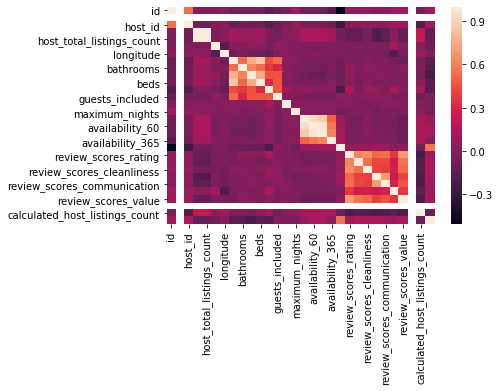

In [6]:
sns.heatmap(listings_df.corr());

It looks like some of these variables are highly correlated, mostly as we would expect -- for example, if one review score is high, the others are likely high as well (eg. rating, accuracy, cleanliness, checkin, communication, value); the location review is the least correlated to the others, which also makes sense. 

Likewise, availabilities are highly correlated (30, 60, 90, 365) as are the variables related to the house size (accomodates, bathrooms, bedrooms, beds, square feet). When determining predictor variables to use, we won't want to use all of the highly correlated values, but perhaps only one most representative value from each group. 

Let's look at a correlation matrix with a reduced number of variables, first let's find a list of the most highly correlated variables in a systematic way. Here I'm following steps from this 
https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

In [7]:
# Create correlation matrix
corr_matrix = listings_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['host_total_listings_count', 'availability_90']

Here we can see that we found the two most highly correlated features. Let's turn this into a function and test some different thresholds to see if we can get some of the other variables we saw that look like they have high correlations. Looking at the heatmap, let's try a correlation threshold of 0.8 to see what that gives us:

In [8]:
def find_correlated_features(df,threshold):
    """
    find_correlated_features returns the numerical columns that are most highly 
    correlated to other columns in a dataframe df, given a user-specified threshold
    
    ARGS:
    df        - dataframe with at least some quanititative columns 
    threshold - the threshold (float between 0-1) you want to set, columns with 
                correlation values higher than this value will be dropped
                
    RETURNS:
    corr_cols - columns with correlation values > threshold (suggested to drop)
    """
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    corr_cols = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return corr_cols

Use this function to show the most highly correlated variables using a threshold of 0.8:

In [9]:
corr_cols = find_correlated_features(listings_df,0.8)
print(corr_cols)

['host_total_listings_count', 'beds', 'availability_60', 'availability_90']


Ok, this gave us a few more. Let's loop through a number of different thresholds from 0.5 to 0.9 and list the correlated columns for each threshold. We can then select the set that looks the best, upon comparison:

In [10]:
thresholds = [0.5,0.6,0.7,0.8,0.9]
for t in thresholds:
    cols = find_correlated_features(listings_df,t)
    print(str(t) + ':' + ','.join(cols))

0.5:host_id,host_total_listings_count,bathrooms,bedrooms,beds,guests_included,availability_60,availability_90,availability_365,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,reviews_per_month
0.6:host_total_listings_count,bedrooms,beds,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_value
0.7:host_total_listings_count,bedrooms,beds,availability_60,availability_90
0.8:host_total_listings_count,beds,availability_60,availability_90
0.9:host_total_listings_count,availability_60,availability_90


In [11]:
# Drop features with > 50% correlation
cols_to_drop = find_correlated_features(listings_df,0.5)
listings_df2 = listings_df.copy().drop(listings_df[cols_to_drop], axis=1)

In [12]:
listings_df2.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_rating,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,95.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,2
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,96.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,97.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2


Let's look at a heatmap of this subsetted dataframe, also dropping columns with NaN or single values (`'id','scrape_id','license'`)

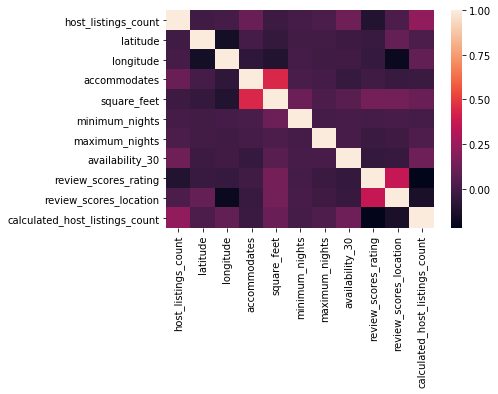

In [13]:
listings_df2 = listings_df2.drop(labels=['id','scrape_id','license'],axis=1)
sns.heatmap(listings_df2.corr());

Identify the columns with the most missing values, setting a threshold of 50%:

In [14]:
most_missing_cols = set(listings_df.columns[listings_df.isnull().mean() > 0.5])
most_missing_cols

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

## 2. Neighbourhood Exploration

After getting this initial understanding of the data, let's take a look at the neighbourhoods, first just looking at the unique values:

In [15]:
listings_df['neighbourhood'].unique()

array(['Queen Anne', nan, 'Ballard', 'Phinney Ridge', 'Fremont',
       'Lower Queen Anne', 'Westlake', 'Wallingford', 'Green Lake',
       'Minor', 'Madrona', 'Harrison/Denny-Blaine', 'Leschi',
       'University District', 'Roosevelt', 'Madison Park', 'Capitol Hill',
       'Atlantic', 'North Beacon Hill', 'Central Business District',
       'Pike Place Market', 'Pike Market', 'Eastlake', 'Portage Bay',
       'South Lake Union', 'Magnolia', 'Belltown',
       'International District', 'Yesler Terrace', 'First Hill',
       'Pioneer Square', 'Gatewood', 'The Junction', 'Arbor Heights',
       'Alki', 'North Admiral', 'Crown Hill', 'Genesee', 'Fairmount Park',
       'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North Delridge',
  

In [16]:
listings_df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

From this initial look at the dataset, some questions to consider include:

    1) do cleanliness review scores vary significantly between different neighborhoods (or neighbourhood groups)?
    2) Are there certain neighbourhoods that have higher proportions of shared housing listings (private room or shared room)

### 2a. Neighbourhood Cleanliness

In this section, I am looking at the relationship between cleanliness ratings and neighborhood, and specifically trying to see if we can tell if traditionally hippy neighborhoods are dirtier than other neighborhoods. I found a Yelp inqury (https://www.yelp.com/topic/seattle-where-my-hippies-at) to identify the hippy hoods, but it sounds like they might not exist any more. However, as a starting point, I considered the responses that *Fremont* and *Ballard* were the original hippy neighborhoods, but also to consider *Columbia City*, *Georgetown*, and *West Seattle*. 

Start by using the `pandas.groupby` method and `agg` to aggregate by the mean and count. Consider only a subset of the full dataframe including the location (lat/lon) and the `review_scores_cleanliness` variable I'm interested in:

In [17]:
#get mean and count of columns in listings_df, grouped by neighborhood
hood_ratings = listings_df.copy().groupby('neighbourhood').agg(['mean','count'])

#subset to include only columns of interest
hood_ratings = hood_ratings[['latitude','longitude','review_scores_cleanliness']].reset_index()

#display the first entries of this new dataframe, default is sorted by neighborhood alphabetically
hood_ratings.head() 

neighbourhood   latitude         longitude       review_scores_cleanliness  \
                       mean count        mean count                      mean   
0           Alki  47.571967    23 -122.408159    23                  9.733333   
1  Arbor Heights  47.510145     3 -122.381473     3                  9.666667   
2       Atlantic  47.594896    50 -122.304818    50                  9.627907   
3        Ballard  47.674617   213 -122.379902   213                  9.666667   
4       Belltown  47.615125   204 -122.345542   204                  9.543956   

         
  count  
0    15  
1     3  
2    43  
3   183  
4   182

Let's look at a map centered at this mean lat/lon, so we can more easily visualize trends related to neighborhood, for this we'll first need to get the center location of all the listings:

In [18]:
print('center latitude: '+str(np.round(listings_df['latitude'].mean(),3)))
print('center longitude: '+str(np.round(listings_df['longitude'].mean(),3)))

center latitude: 47.629
center longitude: -122.333


Using the `basemap` package we can visualize the data nicely:

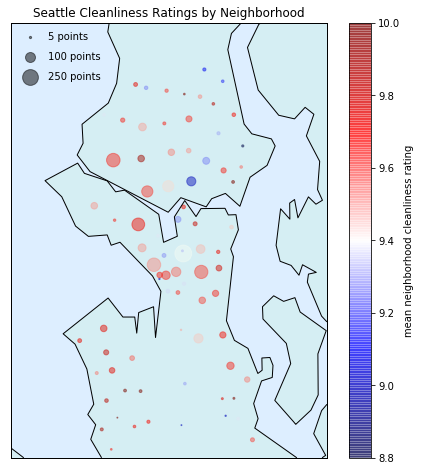

In [19]:
# create basemap figure, this will be the background over which to display the neighborhood data:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
            width=20000, height=27500, resolution='h');
m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.1);
m.drawmapboundary(fill_color="#DDEEFF"); m.drawcoastlines();

# Extract the data we're interested in -
# lat/lon, neigborhood names, and mean and count of cleanliness ratings
lats = hood_ratings[('latitude','mean')].values
lons = hood_ratings[('longitude','mean')].values
mean_clean_ratings = hood_ratings[('review_scores_cleanliness','mean')].values
count = hood_ratings[('review_scores_cleanliness','count')].values

# scatter airbnb data, with color reflecting rating, and size reflecting # of points (count)
m.scatter(lons, lats, latlon=True,
          c=mean_clean_ratings, s=count,
          cmap='seismic', alpha=0.5)
         
# create colorbar and legend
plt.colorbar(label='mean neighborhood cleanliness rating')

# make legend with dummy points
for a in [5, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a) + ' points')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, loc='upper left');
plt.gca().set_title("Seattle Cleanliness Ratings by Neighborhood");

From this map, we can gather a few things:
    1. in general the mean score is fairly high (>8.8), and most neighbhorhoods score above 9.4. This could be because all the AirBnBs are fairly clean, or because people tend to leave more positive ratings if they leave a review, or any number of other reasons. 
    2. there are more data points near the center of Seattle, and may not be sufficient data points on the outskirts of Seattle to make any definitive conclusions about those neighbourhoods.
    3. There are a few neighborhoods with a large number of datapoints that have a lower overall cleanliness rating, eg. possibly the University district. 

Let's pull in a map of the neighborhoods for reference:

<img src="seattle-hoods.jpg" style="width: 400px;">

Source: https://www.remaxonmarket.com/search-seattle-homes-by-neighborhood/

Let's look at the top 5 neighborhoods with the cleanest and dirtiest ratings:

In [20]:
hood_ratings.sort_values([('review_scores_cleanliness','mean')],ascending=False).tail(10)

neighbourhood   latitude         longitude        \
                              mean count        mean count   
61              Ravenna  47.674228    59 -122.301445    59   
11           Cedar Park  47.719474     8 -122.287451     8   
52        Olympic Hills  47.726167    12 -122.302964    12   
73  University District  47.662569   107 -122.314040   107   
70           South Park  47.523924     2 -122.322396     2   
67    South Beacon Hill  47.529232     2 -122.285153     2   
54          Pike Market  47.607060     2 -122.340955     2   
75           View Ridge  47.682680     6 -122.270556     6   
17       Fairmount Park  47.550024     1 -122.381231     1   
50   North College Park  47.704953     1 -122.343314     1   

   review_scores_cleanliness        
                        mean count  
61                  9.250000    48  
11                  9.142857     7  
52                  9.100000    10  
73                  9.000000    83  
70                  9.000000     1  
67                  9.000000     2  
54                  9.000000     2  
75                  8.800000     5  
17                       NaN     0  
50                       NaN     0

In [21]:
hood_ratings.sort_values([('review_scores_cleanliness','mean')],ascending=False).head(10)

neighbourhood   latitude         longitude        \
                        mean count        mean count   
56      Pinehurst  47.712182     3 -122.319898     3   
6        Brighton  47.539153     5 -122.278180     5   
34    Laurelhurst  47.662209     9 -122.278754     9   
62      Riverview  47.543262     8 -122.356807     8   
28     High Point  47.543580    11 -122.369897    11   
64        Roxhill  47.528169     1 -122.376347     1   
53  Phinney Ridge  47.675533    56 -122.356374    56   
18     Fauntleroy  47.521486    10 -122.389487    10   
43    Meadowbrook  47.706630     9 -122.295389     9   
21       Gatewood  47.537877    18 -122.385525    18   

   review_scores_cleanliness        
                        mean count  
56                 10.000000     3  
6                  10.000000     4  
34                 10.000000     8  
62                 10.000000     8  
28                 10.000000     8  
64                 10.000000     1  
53                  9.906977    43  
18                  9.888889     9  
43                  9.857143     7  
21                  9.846154    13

As mentioned earlier, a handful of these neighbourhoods had very few data points, so we can remove these from our analysis, by taking a subset of only neighbourhoods with > 25 points.

In [22]:
hood_ratings_high_count = hood_ratings[hood_ratings[('review_scores_cleanliness','count')]>25]

In [23]:
hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).head(10)

neighbourhood   latitude         longitude        \
                            mean count        mean count   
53      Phinney Ridge  47.675533    56 -122.356374    56   
22            Genesee  47.565288    29 -122.385817    29   
39            Madrona  47.613210    40 -122.290727    40   
47      North Admiral  47.578909    48 -122.387890    48   
72       The Junction  47.555040    36 -122.380833    36   
59         Queen Anne  47.638069   187 -122.358780   187   
46        Mount Baker  47.575208    46 -122.287461    46   
55  Pike Place Market  47.609306    39 -122.340744    39   
9              Bryant  47.668759    32 -122.286768    32   
13      Columbia City  47.557671    61 -122.281073    61   

   review_scores_cleanliness        
                        mean count  
53                  9.906977    43  
22                  9.807692    26  
39                  9.787879    33  
47                  9.744186    43  
72                  9.741935    31  
59                  9.711656   163  
46                  9.692308    39  
55                  9.677419    31  
9                   9.666667    27  
13                  9.666667    54

In [24]:
hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=True).head(10)

neighbourhood   latitude         longitude        \
                              mean count        mean count   
73  University District  47.662569   107 -122.314040   107   
61              Ravenna  47.674228    59 -122.301445    59   
16             Eastlake  47.640933    41 -122.325259    41   
10         Capitol Hill  47.621535   351 -122.320792   351   
76          Wallingford  47.659809   143 -122.333501   143   
49    North Beacon Hill  47.573244    95 -122.308032    95   
71              Stevens  47.624053    98 -122.306159    98   
25            Greenwood  47.693461    79 -122.355271    79   
40             Magnolia  47.648660    55 -122.395953    55   
37     Lower Queen Anne  47.624742    83 -122.355568    83   

   review_scores_cleanliness        
                        mean count  
73                  9.000000    83  
61                  9.250000    48  
16                  9.257143    35  
10                  9.398601   286  
76                  9.440000   125  
49                  9.464286    84  
71                  9.480000    75  
25                  9.508475    59  
40                  9.522727    44  
37                  9.523810    63

Now make a map that shows the highest and lowest cleanliness ratings for this subsetted data:

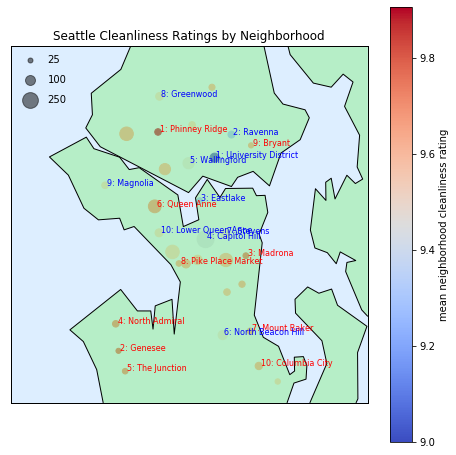

In [25]:
# Create basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
            width=20000, height=20000, resolution='h');
m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.5);
m.drawmapboundary(fill_color="#DDEEFF");
m.drawcoastlines();

# Extract the data we're interested in
lats = hood_ratings_high_count[('latitude','mean')].values
lons = hood_ratings_high_count[('longitude','mean')].values
hoods = hood_ratings_high_count['neighbourhood'].values
mean_clean_ratings = hood_ratings_high_count[('review_scores_cleanliness','mean')].values
count = hood_ratings_high_count[('review_scores_cleanliness','count')].values

# scatter airbnb data, with color reflecting rating, and size reflecting # of points
m.scatter(lons, lats, latlon=True,
          c=mean_clean_ratings, s=count,
          cmap='coolwarm', alpha=1)

# create sorted dataframes of the cleanest and dirtiest rated airbnb listings to label on map
# only include neigborhoods with at least 25 data points 
cleanest = hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).reset_index().head(10)
dirtiest = hood_ratings_high_count.sort_values([('review_scores_cleanliness','mean')],ascending=False).reset_index().tail(10)

# add labels for the 10 cleanest neighborhoods in red 
k = 1
for i, row in cleanest.iterrows():
    x = row[('longitude','mean')]
    y = row[('latitude','mean')]
    hood = row['neighbourhood'][0]
    plt.text(m(x,y)[0]+100,m(x,y)[1],str(k)+': '+hood,fontsize=8,color='r')
    k+=1

# add labels for 10 dirtiest neighborhoods in blue
k=1
for i, row in dirtiest.iterrows():
    x = row[('longitude','mean')]
    y = row[('latitude','mean')]
    hood = row['neighbourhood'][0]
    plt.text(m(x,y)[0]+100,m(x,y)[1],str(11-k)+': '+hood,fontsize=8,color='b') 
    k+=1
         
# create colorbar and legend
plt.colorbar(label='mean neighborhood cleanliness rating')

# make legend with dummy points
for a in [25, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a, label=str(a))
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, loc='upper left');
plt.gca().set_title("Seattle Cleanliness Ratings by Neighborhood");

## Discussion Q1:

There does not appear to be any strong relationship between the yelp-suggested hippy neighborhoods and dirtier ratings (aside from possibly `Columbia City`), so there could be other factors at play
    
    1) gentrification may have pushed hippies out (as suggested by some of the locals on Yelp, see quote below
    2) hippies may not be dirty, or
    3) hippies just aren’t using AirBnB, but share their homes on couch surfing (or word of mouth)


*Fremont used to be a hippie-ish enclave in Seattle, and still retains some vestiges thereof, but is in actuality all but lost to gentrification with half million dollar townhouses going up constantly along the roads leading to the main drag. - Ian M.*

### 2b. Communal Living
We can also use another metric (stereotype) to approximate hippiness -- communal living. In this next section, I explore the relationship between neighborhood and the house type - full house v. private room v. shared room  ... 

First I just take a look at the `room_type` column to get a sense of the count and proportion of each room category in the full dataset:

In [26]:
# display count of each room type in listings data
listings_df['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [27]:
# display proportion of each room type
listings_df['room_type'].value_counts(normalize=True)

Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: room_type, dtype: float64

Only 3% of the listings are shared rooms, but we can still see if there are any trends here:

The `pandas.crosstab` method is a handy way to look at the frequency of different categories grouped by another. Let's look at our how room types are represented in each neighborhood: 

In [28]:
# display count of each room type, grouped by neighborhood
pd.crosstab(listings_df['neighbourhood'],listings_df['room_type']).head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Alki,19,4,0
Arbor Heights,2,1,0
Atlantic,34,16,0
Ballard,138,75,0
Belltown,192,9,3


We can use a `lambda` function to turn these into fractions, and look at the proportion of each room type, grouped by neighborhood:

In [29]:
# display proportion of each room type, grouped by neighborhood
hood_roomtypes = pd.crosstab(listings_df['neighbourhood'],listings_df['room_type']).apply(lambda r: r/r.sum(), axis=1)
hood_roomtypes.head(3)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Alki,0.826087,0.173913,0.0
Arbor Heights,0.666667,0.333333,0.0
Atlantic,0.680000,0.320000,0.0


`seaborn.heatmap` is a quick way to look at the breakdown by neighbourhood:

Text(195.0, 0.5, 'room type')

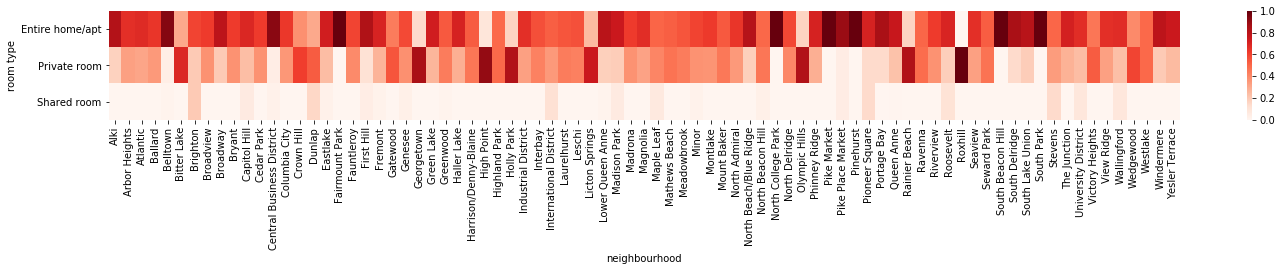

In [30]:
# Use heatmap to create visual display
fig, ax = plt.subplots(figsize=(24,2))  
sns.heatmap(hood_roomtypes.transpose(), cmap="Reds",ax=ax);
ax.set_ylabel('room type')

Let's look at the top neighbourhoods for each room type proportion:

In [31]:
#Show top 10 neighborhoods with highest proportion of entire home listings
hood_roomtypes.sort_values([('Entire home/apt')],ascending=False).head(10)

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Pinehurst,1.000000,0.000000,0.000000
Fairmount Park,1.000000,0.000000,0.000000
South Park,1.000000,0.000000,0.000000
North College Park,1.000000,0.000000,0.000000
South Beacon Hill,1.000000,0.000000,0.000000
Pike Market,1.000000,0.000000,0.000000
Belltown,0.941176,0.044118,0.014706
Central Business District,0.925926,0.049383,0.024691
Pike Place Market,0.897436,0.051282,0.051282


In [32]:
#Show top 10 neighborhoods with highest proportion of private room listings
hood_roomtypes.sort_values([('Private room')],ascending=False).head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Roxhill,0.000000,1.000000,0.0
High Point,0.090909,0.909091,0.0
Georgetown,0.142857,0.857143,0.0
Rainier Beach,0.166667,0.833333,0.0
Holly Park,0.166667,0.833333,0.0


In [33]:
#Show top 10 neighborhoods with highest proportion of shared room listings
hood_roomtypes.sort_values([('Shared room')],ascending=False).head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Brighton,0.600000,0.200000,0.200000
Dunlap,0.307692,0.538462,0.153846
Stevens,0.510204,0.346939,0.142857
Pioneer Square,0.714286,0.142857,0.142857
International District,0.529412,0.352941,0.117647


To plot this data in map-view we need to add in the lat/lon information, which is done in the next few steps:

In [34]:
#create dataframe containing of the mean lat/lon of each neighbourhood
hood_latlon = listings_df[['neighbourhood','latitude','longitude']].groupby('neighbourhood').mean()
hood_latlon.head(3)

,latitude,longitude
neighbourhood,,
Alki,47.571967,-122.408159
Arbor Heights,47.510145,-122.381473
Atlantic,47.594896,-122.304818


In [35]:
#merge this with the neighbourhood roomtypes dataframe
hood_roomtypes_latlon = hood_roomtypes.merge(hood_latlon,left_index=True,right_on='neighbourhood')
hood_roomtypes_latlon.head(3)

,Entire home/apt,Private room,Shared room,latitude,longitude
neighbourhood,,,,,
Alki,0.826087,0.173913,0.0,47.571967,-122.408159
Arbor Heights,0.666667,0.333333,0.0,47.510145,-122.381473
Atlantic,0.680000,0.320000,0.0,47.594896,-122.304818


Lastly, we want to include the count (# of data points used for each neighbourhood), for reference

In [36]:
# get the count and append as new column to dataframe created above
hood_roomtypes_latlon['count'] = pd.crosstab(listings_df['neighbourhood'],listings_df['room_type']).apply(lambda r: r.sum(), axis=1)
hood_roomtypes_latlon.head(3)

,Entire home/apt,Private room,Shared room,latitude,longitude,count
neighbourhood,,,,,,
Alki,0.826087,0.173913,0.0,47.571967,-122.408159,23
Arbor Heights,0.666667,0.333333,0.0,47.510145,-122.381473,3
Atlantic,0.680000,0.320000,0.0,47.594896,-122.304818,50


Now that the data I'm interested in is all in one place (dataframe), I'll use `basemap` again to display in map view, this time creating three maps, showing the proportion of each of the three room types. 

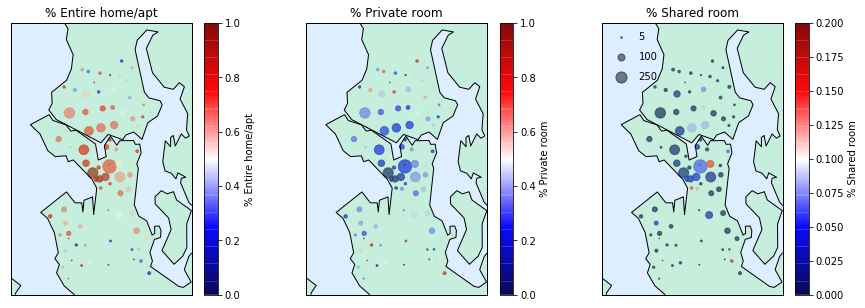

In [37]:
# Create figure with 3 subplots, which will fill in with the data in a loop
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the three room types to create plot displaying each 
for i, room_type in enumerate(['Entire home/apt', 'Private room', 'Shared room']):
    # create basemap
    m = Basemap(projection='lcc', lat_0=47.629, lon_0=-122.333,
                width=20000, height=30000, resolution='h',ax=ax[i]);
    m.fillcontinents(color="lightgreen", lake_color='#DDEEFF',alpha=0.3);
    m.drawmapboundary(fill_color="#DDEEFF"); m.drawcoastlines();

    # extract the data we're interested in (lat,lon,)
    lats = hood_roomtypes_latlon['latitude'].values
    lons = hood_roomtypes_latlon['longitude'].values
    roomtype = hood_roomtypes_latlon[room_type].values
    count = hood_roomtypes_latlon['count'].values

    # scatter airbnb data, with color reflecting rating [and size reflecting # of points]
    scatter = m.scatter(lons, lats, latlon=True, c=roomtype, s=count/2, cmap='seismic', alpha=0.8)
    
    # create colorbar
    plt.colorbar(scatter,ax=ax[i],label='% '+ room_type) 
    ax[i].set_title('% ' + room_type);
    
    # make legend with dummy points
for a in [5, 100, 250]:
    plt.scatter([], [], c='k', alpha=0.5, s=a/2, label=str(a))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left');

### Discussion on Neighborhood Cleanliness and Communal Living Analysis:

It appears that there are some neighbourhoods that foster more communal AirBnB listings, but it doesn't seem to be in the traditionally "hippy" neighbourhoods (aside from possibly Columnbia City) as suggested by the Yelp post, so there could be other factors at play: 
    
    1) gentrification (or related factors - changing culture, etc). may have pushed hippies out, as suggested by some of the locals on Yelp
    2) hippies may not be dirty, or 
    3) hippies aren’t using AirBnB
    
Take a look at my Medium post (https://medium.com/@bridgethass/whered-the-hippies-go-aee4b0876dc7) for further discussion. 

## 3 Predicting Cleanliness
**Cleanliness is next to Godliness?*** 

The third part of this analysis I create and assess a linear regression model to predict `cleanliness_review_score` from other predictor variables contained within the `listings.csv` file. The two main questions I attempt to answer are:

    1) What (other) factors affect AirBnB cleanliness rating?
    2) Can we make a viable model to predict cleanliness rating?

Most of this notebook centers around preparing the data set, and getting a better sense of the information contained in the dataset. First, import required packages, and make sure that the `pandas` version is at least 0.25+ so we can use the handy `explode` method.

To start, I'll try to visualize which (if any) of the quantitative columns are related to `review_scores_cleanliness`. From the heatmap plotted at the beginning of this notebook, it looks like all the review scores were highly correlated, suggesting that possibly guests who left reviews may have used an "overall impression" for all of the categories they could review on. I want to see if there are any separate factors that could be used to predict the cleanliness rating (aside from other ratings), so I'll create a correlation between that variable and all non-review variables:

In [38]:
#delete and re-create listings dataframe directly from listings.csv 
del listings_df
listings_df = pd.read_csv('../data/listings.csv')

In [39]:
review_drop_cols = [col for col in listings_df.columns if ('review' in col and col!='review_scores_cleanliness')]
review_drop_cols

['number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [40]:
listings_df=listings_df.drop(review_drop_cols,axis=1)

I'll also drop columns that have > 75% missing data:

In [41]:
most_missing_cols = set(listings_df.columns[listings_df.isnull().mean() > 0.75])
most_missing_cols

{'license', 'square_feet'}

In [42]:
listings_df = listings_df.drop(list(most_missing_cols),axis=1)

And, lastly, will remove unrelated columns like the urls and ids:

In [43]:
id_url_cols = [col for col in listings_df.columns if ('url' in col or 'id' in col)]
listings_df = listings_df.drop(id_url_cols,axis=1)

Now let's take another look at the correlation matrix to see if there are any noticable patterns:

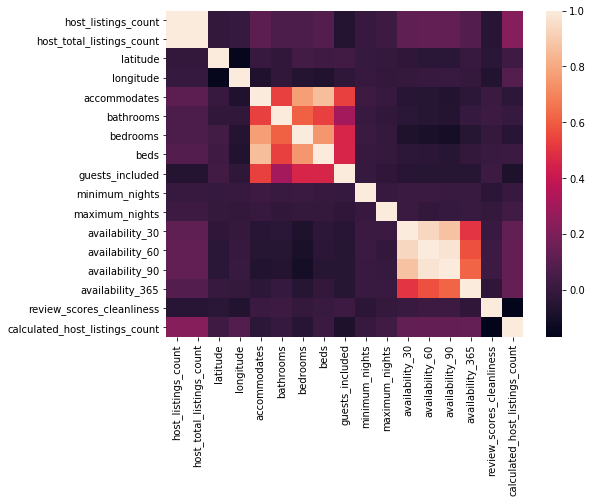

In [44]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(listings_df.corr())

This still doesn't look great, all of the values in the `cleanliness` are low (aside from its correlation with itself). Next I'll try to see if there are any categorical variables that are more highly correlated. First let's take a look at the categorical variables in the dataset:

In [45]:
#find categorical columns and display them
listings_cat_cols = listings_df.select_dtypes(include='object')
listings_cat_cols.columns

Index(['last_scraped', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
  

Weeding out a few more of these columns that don't seem relevant or are more descriptive in nature, I'll focus on in a smaller subset of these:

In [46]:
cols_of_interest = ['host_is_superhost','neighbourhood_group_cleansed',
                    'property_type', 'room_type','bed_type', 'amenities', 
                    'price', 'security_deposit', 'cleaning_fee','review_scores_cleanliness']

listings_df = listings_df[cols_of_interest]

I'll look at the correlation between room type and cleanliness rating first. By using groupby and agg, as earlier, I can see what the values look like:

In [47]:
# mean cleanliness score by room type
room_type_cleanliness = listings_df.copy().groupby(['room_type']).agg(['mean','count'])
room_type_cleanliness[[('review_scores_cleanliness','mean'),('review_scores_cleanliness','count')]].sort_values(by=('review_scores_cleanliness','mean'),ascending=False)

review_scores_cleanliness      
                                     mean count
room_type                                      
Entire home/apt                  9.587376  2123
Private room                     9.542105   950
Shared room                      8.989130    92

To get a more quantitative understanding of whether these columns are correlated, I found a couple useful resources on Medium-Towards Data Science and Stack Overflow: 

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792

Borrowing the `cramers_v` function from the stackoverflow post (also shown on the TDS blog), I'll apply it to some categorical data in this dataset:

In [48]:
def cramers_v(df,predictor_var,response_var='review_scores_cleanliness'):
    """ 
        Calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
        
        ARGS:
            df - a dataframe holding all the variables of interest and response_var
            predictor_var - a string holding the name of the predictor column you correlate to response_var
            response_var  - a string holding the name of the response column 
        
        RETURNS:
        cramers_v - cramers coefficient matrix (intercorrelation of two discrete variables), 
                    float between 0 and 1 (highest correlation)
    """
    confusion_matrix = pd.crosstab(df[predictor_var], listings_df[response_var]).values
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    
    return cramers_v

In [49]:
# cramers_phi score for the correlation between room_type & review_scores_cleanliness
print(np.round(cramers_v(listings_df,'room_type'),3))

0.101


Next look at a few other variables - define and use few functions to easily look at several columns without repeating code:

In [50]:
def group_cleanliness(df,predictor_var,response_var='review_scores_cleanliness'):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest and response_var
    predictor_var - a string holding the name of the predictor column you want to assess
    response_var  - a string holding the name of the response column you want to group by \
                    default is `review_scores_cleanliness`
    
    OUTPUT:
    df_sorted - a sorted dataframe consisting of the predictor_variable categories as the index \
                and mean and count of the response variable by each predictor category
    
    '''
    df_clean = df.copy().groupby([predictor_var]).agg(['mean','count'])
    df_sorted = df_clean[[(response_var,'mean'),(response_var,'count')]].sort_values(by=(response_var,'mean'),ascending=False)
    return df_sorted

Apply this function to see if there are any noticeable relationships between cleanliness and some of the other categorical variables:

In [51]:
for col in ['property_type','bed_type','host_is_superhost','neighbourhood_group_cleansed']:
    print(col+' cv-score: '+str(np.round(cramers_v(listings_df,col),3)))
    df = group_cleanliness(listings_df,col)
    display(df)

property_type cv-score: 0.018


review_scores_cleanliness      
                                     mean count
property_type                                  
Bungalow                        10.000000     9
Treehouse                       10.000000     2
Yurt                            10.000000     1
Cabin                            9.809524    21
Boat                             9.800000     5
Camper/RV                        9.800000    10
Townhouse                        9.750000    80
Condominium                      9.652174    69
Bed & Breakfast                  9.615385    26
Loft                             9.606061    33
Other                            9.578947    19
House                            9.558682  1457
Apartment                        9.529123  1425
Tent                             9.500000     4
Dorm                             9.000000     2
Chalet                           8.000000     2

bed_type cv-score: 0.0


review_scores_cleanliness      
                                   mean count
bed_type                                     
Pull-out Sofa                  9.615385    39
Real Bed                       9.559434  3037
Couch                          9.500000     8
Futon                          9.428571    63
Airbed                         9.388889    18

host_is_superhost cv-score: 0.256


review_scores_cleanliness      
                                       mean count
host_is_superhost                                
t                                  9.885486   751
f                                  9.454018  2414

neighbourhood_group_cleansed cv-score: 0.05


review_scores_cleanliness      
                                                  mean count
neighbourhood_group_cleansed                                
Interbay                                      9.777778     9
West Seattle                                  9.753086   162
Delridge                                      9.738462    65
Seward Park                                   9.717949    39
Queen Anne                                    9.682927   246
Ballard                                       9.668394   193
Northgate                                     9.661538    65
Central Area                                  9.655172   319
Rainier Valley                                9.626866   134
Downtown                                      9.567033   455
Lake City                                     9.535714    56
Other neighborhoods                           9.532925   653
Beacon Hill                                   9.466019   103
Magnolia                                      9.446809    47
Capitol Hill                                  9.424837   459
Cascade                                       9.261538    65
University District                           9.063158    95

Let's just look at the cramer's score for simplification:

In [52]:
for col in ['property_type','room_type','bed_type','host_is_superhost','neighbourhood_group_cleansed']:
    print(col+': '+str(np.round(cramers_v(listings_df,col),3)))

property_type: 0.018
room_type: 0.101
bed_type: 0.0
host_is_superhost: 0.256
neighbourhood_group_cleansed: 0.05


So looks like `property_type`, `bed_type`, and `neighbourhood_group` are pretty much negligible (which also tells us more quantitatively that the relationships we saw in the first part of this notebook are perhaps not statistically viable), but `host_is_superhost` and `bed_type` may have some influence. 

In [53]:
listings_df = listings_df.drop(['bed_type','property_type','neighbourhood_group_cleansed'],axis=1)

Also, we've so far ignored the price-related and amenities columns, which we'll deal with now.
To handle prices, even though these are considered object (categorical) data, this is better suited to be a continuous variable. We can convert thse to floats using `str.replace` to get rid of the non-numerical characters ($ and ,) and then casting to a new type.

In [54]:
# convert price columns to float values, using string replace and casting to float
price_cols = ['price','cleaning_fee','security_deposit']
for col in price_cols:
    listings_df[col] = listings_df[col].str.replace('[\$,]', '', regex=True).astype(float)

In [55]:
listings_df[['price','cleaning_fee','security_deposit']].head()

,price,cleaning_fee,security_deposit
0,85.0,NaN,NaN
1,150.0,40.0,100.0
2,975.0,300.0,1000.0
3,100.0,NaN,NaN
4,450.0,125.0,700.0


Now that we've done some pre-processing let's look at the number of different options in the categorical variables, which if we encode will expand the # of features considerably:

In [56]:
for col in listings_df.select_dtypes(include='object'):
    print(col + ': ' + str(len(listings_df[col].unique())))

host_is_superhost: 3
room_type: 3
amenities: 3284


We need to do something about the `amenities` column, since there may be some information contained in here that may have some influence on the rating, but right now there are way too many values in this to just throw it into the model as-is. I want to create a list of all the unique amenities, not a unique set of all the lists. 

Using tips from this stackoverflow post, I found I can extract the unique values using `explode`:
https://stackoverflow.com/questions/51813266/get-unique-values-from-pandas-series-of-lists

To use this, first I need to clean this column so that each entry is a list, and strip out the superfluous characters such as `{`  and `}`. 

In [57]:
# Clean amenities to create list of each values
clean_amenities = lambda col: col.strip('{}').split(',')
# Apply the function to the 'amenities' column
listings_df['amenities_list'] = listings_df['amenities'].apply(clean_amenities)

Now I can look at the unique amenities in a single line:

In [58]:
listings_df['amenities_list'].explode().value_counts()

"Wireless Internet"             3667
Heating                         3627
Kitchen                         3423
"Smoke Detector"                3281
Essentials                      3237
Dryer                           2997
Washer                          2992
Internet                        2811
Shampoo                         2670
TV                              2574
"Carbon Monoxide Detector"      2485
"Fire Extinguisher"             2196
"Free Parking on Premises"      2167
"Family/Kid Friendly"           1963
"First Aid Kit"                 1680
"Cable TV"                      1446
"Indoor Fireplace"               886
"Pets live on this property"     883
Hangers                          846
"Elevator in Building"           785
"Hair Dryer"                     774
"Laptop Friendly Workspace"      745
Iron                             742
"Safety Card"                    727
"Air Conditioning"               677
"24-Hour Check-in"               616
"Buzzer/Wireless Intercom"       538
D

In [59]:
# get the length to see how many distinct amenities there are
len(listings_df['amenities_list'].explode().value_counts())

42

There are still 42 unique values for the amenities, reading through the list let's make some separate columns for the amenities which we think might affect cleanliness, like whether the listing has or allows `pets`, `smoking`, and `fireplaces`.

In [60]:
listings_df['pet_friendly'] = listings_df['amenities'].str.contains('|'.join(['Pet','pet','Cat','Dog']))
listings_df['pet_friendly'] = listings_df['pet_friendly'].map({True: 'Yes', False: 'No'})

We can create the other fields like this from the amenities more systematically using a function, given the exact name of the amenity we are looking for.

In [61]:
def create_col_from_amenity(df,amenity_str,new_col_name):
    '''
    INPUTS
    df - dataframe containing `amenities` column (listings_df)
    amenity - the name of the amenity (or could also be substring that is only in that amenity)
    new_col_name - name of column to be appended (eg. smoker_friendly)
    
    OUTPUTS
    df - dataframe with new appended boolean (t/f) column indicating existence of amenity
    
    eg. create_col_from_amenity(listings_df,'Smoking Allowed',smoker_friendly')
    '''
    
    df[new_col_name] = df['amenities'].str.contains(amenity_str)
    return df

In [62]:
amenity_dict = {'Smoking Allowed':'smoker_friendly','Fireplace':'has_fireplace'}

for key,val in amenity_dict.items():
    listings_df = create_col_from_amenity(listings_df,key,val)

In [63]:
# see added columns
listings_df.columns

Index(['host_is_superhost', 'room_type', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'review_scores_cleanliness',
       'amenities_list', 'pet_friendly', 'smoker_friendly', 'has_fireplace'],
      dtype='object')

In [64]:
for col in ['pet_friendly','smoker_friendly','has_fireplace']:
    print(col+' cv-score: '+str(np.round(cramers_v(listings_df,col),3)))
    df = group_cleanliness(listings_df,val)
    display(df)

pet_friendly cv-score: 0.0


review_scores_cleanliness      
                                   mean count
has_fireplace                                
False                          9.560313  2429
True                           9.543478   736

smoker_friendly cv-score: 0.051


review_scores_cleanliness      
                                   mean count
has_fireplace                                
False                          9.560313  2429
True                           9.543478   736

has_fireplace cv-score: 0.043


review_scores_cleanliness      
                                   mean count
has_fireplace                                
False                          9.560313  2429
True                           9.543478   736

It doesn't look like these variables have much of an effect on the cleanliness rating either, but at least we checked. Let's drop the original `amenities` and `amenities_list` column, and the pet_friendly column that's completely un-correlated. Anyway, I'll try to run a model and see if it works.

In [65]:
listings_df = listings_df.drop(['amenities','amenities_list','pet_friendly'],axis=1)

In [66]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - boolean holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [67]:
#Create a list of the column names of the categorical variables
cat_cols_lst = list(listings_df.select_dtypes(include='object').columns)

df_dummy = create_dummy_df(listings_df, cat_cols_lst,dummy_na=True)
list(df_dummy.columns)

['price',
 'security_deposit',
 'cleaning_fee',
 'review_scores_cleanliness',
 'smoker_friendly',
 'has_fireplace',
 'host_is_superhost_t',
 'host_is_superhost_nan',
 'room_type_Private room',
 'room_type_Shared room',
 'room_type_nan']

In [68]:
def clean_fit_linear_mod(df, response_col, cat_cols, fill_mean=True, dummy_na=True, test_size=.3, rand_state=42):
    '''
    This function cleans, fits a linear model, and returns the model plus r2 train and test scores
    Cleaning entails: - drop the rows with missing response values
                      - drop columns with NaN for all the values
                      - filling NA values with mean for that column (default) or dropping column 
    
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    fill_mean - boolean of wehther or not to fill the mean or just drop columns with NA values
    dummy_na - boolean holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    if fill_mean == True:
        # Mean function
        fill_mean = lambda col: col.fillna(col.mean())
        # Fill the mean
        df = df.apply(fill_mean, axis=0)
    else:
        df = df.dropna(axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [69]:
#Test function with the dataset, filling mean, and using dummy_na
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(listings_df,'review_scores_cleanliness', cat_cols_lst, fill_mean=True, dummy_na=True)
print("The r-squared train score and test score were %.3f and %.3f" % (train_score,test_score))

The r-squared train score and test score were 0.069 and 0.062


In [70]:
#Test function with the dataset, dropping nan rows instead of filling mean
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(listings_df,'review_scores_cleanliness', cat_cols_lst, fill_mean=True, dummy_na=True)
print("The r-squared train score and test score were %.3f and %.3f" % (train_score,test_score))

The r-squared train score and test score were 0.069 and 0.062


This isn't a great result, now I'll check if filling the mean was diluting the results ...

In [71]:
#Test function with the dataset, dropping nan rows instead of filling mean
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(listings_df,'review_scores_cleanliness', cat_cols_lst, fill_mean=False, dummy_na=True)
print("The r-squared train score and test score were %.3f and %.3f" % (train_score,test_score))

The r-squared train score and test score were 0.134 and 0.078


This result is marginally better, but still isn't great by any means, but will stop here for now. I suspect based off of exploring the correlation between variables this may not be an easily answered question, but I did learn some things along the way, and definitely some handy tools:

### Discussion:

- Factors that I thought would affect the cleanliness rating, such as the presence of pets (or really any of the variables I looked at), did not seem to, aside from some marginal correlation between factors such as whether the host is a superhost and the room type. I could try to improve this by including more predictor variables (including from the other the other csvs included in this dataset), but first it's important to understand the limitations of what we can determine and consider what else might be going on.

- From looking at the correlation matrix in the beginning, it seems like the cleanliness rating is more related to the overall rating than anything else ... could be that if someone likes a place, they rank it high for everything instead of putting a lot of thought into ranking each item individually. Or, AirBnB hosts do a good job of keeping their places clean, even if they have pets or fireplaces or allow smoking. Which you'd hope is the case, given the cleaning fee they tack on. Since AirBnBs are competing with hotels, and having a clean place to stay is often an important factor, it makes sense that the rentals are clean overall.

- There is minimal variability in the cleanliness rating, so it's possible that the differences we're seeing are within the noise/uncertainty of the dataset (eg. random variability may account for the difference rather than specific features). 

Rather than adding more features, it would more likley help to have more data, and possibly to compare Seattle to other cities, where there may be more variability. 